In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('master_benchmark_epochs.xlsx')

In [11]:
with pd.option_context('display.precision', 2):
    dfc = df.groupby(['batch_size', 'seq_len']).agg({'loss': 'mean', 'perplexity': 'mean', 'time': 'mean'}).reset_index()
    print(dfc)

    batch_size  seq_len  loss  perplexity   time
0            8       64  3.63       88.97  19.00
1            8      128  4.35      156.20  12.18
2            8      512  5.32      411.45   7.63
3            8     1024  5.68      660.87   7.54
4            8     2048  6.11     1129.89   8.07
5           16       64  4.02      135.58  11.74
6           16      128  4.71      238.01   8.73
7           16      512  5.66      649.03   6.95
8           16     1024  6.09     1097.90   7.04
9           16     2048  6.61     1891.85   7.69
10          32       64  4.43      210.38   8.69
11          32      128  5.08      372.61   7.19
12          32      512  6.08     1071.76   6.53
13          32     1024  6.60     1863.50   6.72
14          32     2048  7.26     3458.51   7.57
15          64       64  4.88      342.00   7.19
16          64      128  5.51      631.55  16.07
17          64      512  6.61     1947.08   6.19
18          64     1024  7.24     3296.77   6.57
19         128      

In [14]:
dfc.to_latex('master_benchmark_epochs.tex', index=False, float_format='%.2f')

In [15]:
import torch

In [16]:
t = torch.tensor([1,2,3,4,5]).long()

In [18]:
t.dtype

torch.int64

In [3]:
df_rank0 = df[df['rank'] == 0]

In [4]:
df_rank0.head()

,rank,epoch,loss,perplexity,time,batch_size,total_epochs,seq_len
0,0,1,9.1537,12673.5577,7.2383,32,10,1024
5,0,2,7.5237,1936.8659,6.6502,32,10,1024
10,0,3,6.7906,899.0657,6.6502,32,10,1024
12,0,4,6.4575,639.2275,6.6520,32,10,1024
18,0,5,6.2836,536.4405,6.6673,32,10,1024


In [7]:
df['seq_len'].unique(), df['batch_size'].unique()

(array([1024,  128,  512,   64, 2048]), array([ 32,  16,  64,   8, 128]))

## loss

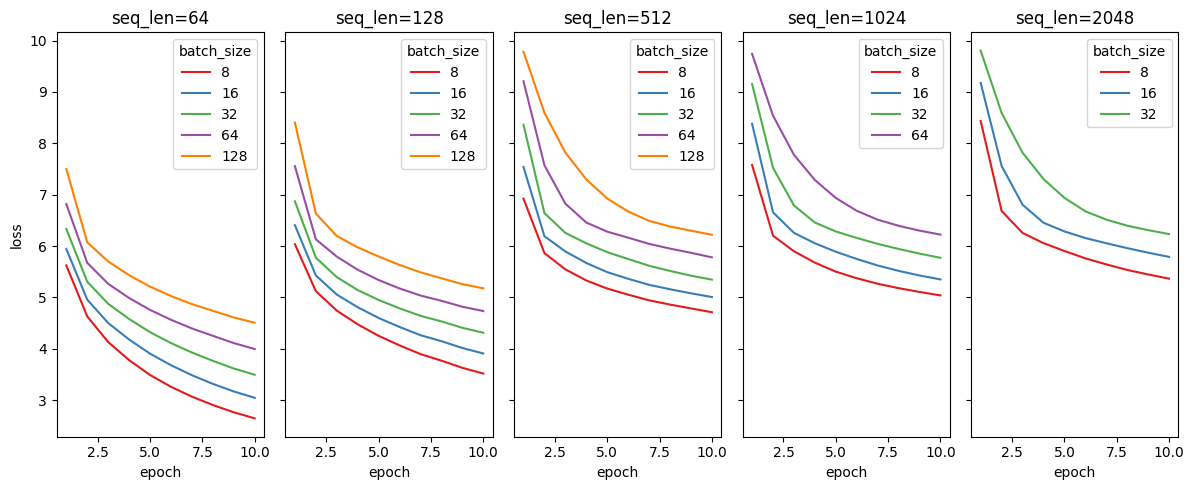

In [21]:
fig, ax = plt.subplots(1, 5, figsize=(12, 5), sharex=True, sharey=True)
ax[0].set_title('seq_len=64')
ax[1].set_title('seq_len=128')
ax[2].set_title('seq_len=512')
ax[3].set_title('seq_len=1024')
ax[4].set_title('seq_len=2048')


sns.lineplot(data=df_rank0[df_rank0['seq_len']==64], x='epoch', y='loss',hue='batch_size', palette='Set1', errorbar=None, ax=ax[0])

sns.lineplot(data=df_rank0[df_rank0['seq_len']==128], x='epoch', y='loss',hue='batch_size', palette='Set1', errorbar=None, ax=ax[1])


sns.lineplot(data=df_rank0[df_rank0['seq_len']==512], x='epoch', y='loss',hue='batch_size', palette='Set1', errorbar=None, ax=ax[2])
sns.lineplot(data=df_rank0[df_rank0['seq_len']==1024], x='epoch', y='loss',hue='batch_size', palette='Set1', errorbar=None, ax=ax[3])
sns.lineplot(data=df_rank0[df_rank0['seq_len']==2048], x='epoch', y='loss',hue='batch_size', palette='Set1', errorbar=None, ax=ax[4])

# remove plot for 1,2
# ax[1, 2].remove()

plt.tight_layout()
plt.savefig('loss_seqlen.pdf', dpi=300)

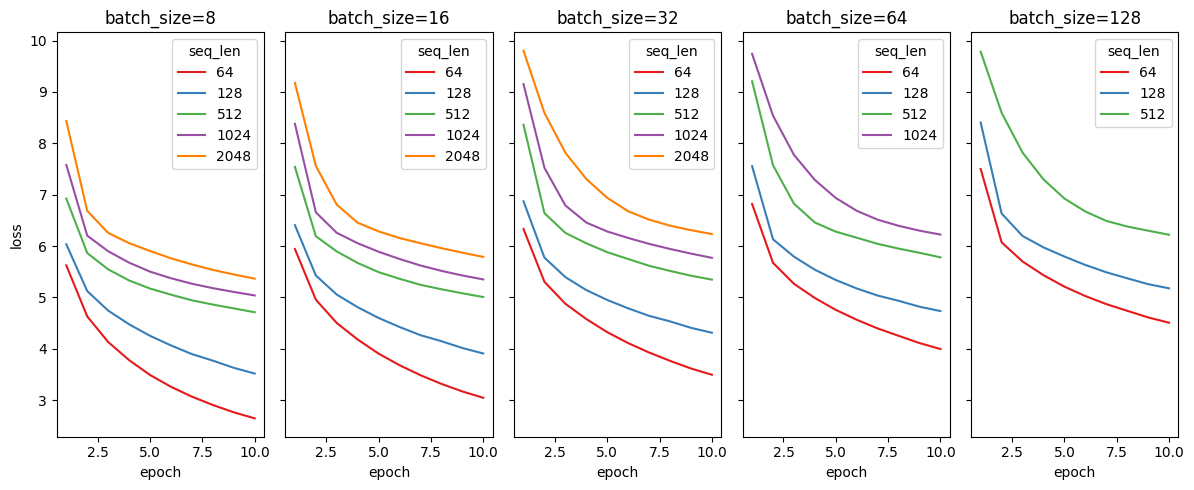

In [22]:
fig, ax = plt.subplots(1, 5, figsize=(12, 5), sharex=True, sharey=True)
ax[0].set_title('batch_size=8')
ax[1].set_title('batch_size=16')
ax[2].set_title('batch_size=32')
ax[3].set_title('batch_size=64')
ax[4].set_title('batch_size=128')


sns.lineplot(data=df_rank0[df_rank0['batch_size']==8], x='epoch', y='loss',hue='seq_len', palette='Set1', errorbar=None, ax=ax[0])

sns.lineplot(data=df_rank0[df_rank0['batch_size']==16], x='epoch', y='loss',hue='seq_len', palette='Set1', errorbar=None, ax=ax[1])


sns.lineplot(data=df_rank0[df_rank0['batch_size']==32], x='epoch', y='loss',hue='seq_len', palette='Set1', errorbar=None, ax=ax[2])
sns.lineplot(data=df_rank0[df_rank0['batch_size']==64], x='epoch', y='loss',hue='seq_len', palette='Set1', errorbar=None, ax=ax[3])
sns.lineplot(data=df_rank0[df_rank0['batch_size']==128], x='epoch', y='loss',hue='seq_len', palette='Set1', errorbar=None, ax=ax[4])

# remove plot for 1,2
# ax[1, 2].remove()

plt.tight_layout()
plt.savefig('loss_batchsize.pdf', dpi=300)

## time

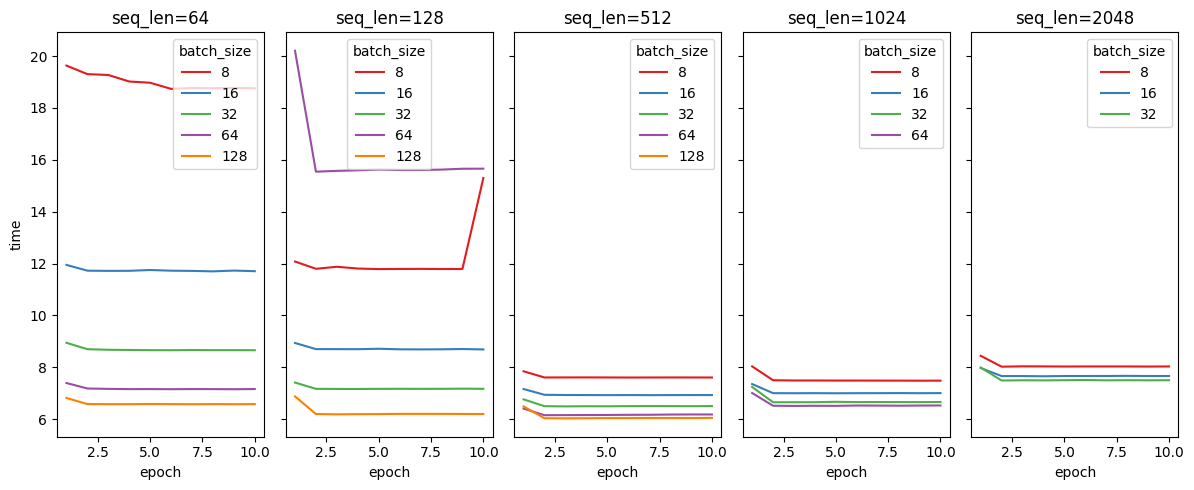

In [23]:
fig, ax = plt.subplots(1, 5, figsize=(12, 5), sharex=True, sharey=True)
ax[0].set_title('seq_len=64')
ax[1].set_title('seq_len=128')
ax[2].set_title('seq_len=512')
ax[3].set_title('seq_len=1024')
ax[4].set_title('seq_len=2048')


sns.lineplot(data=df_rank0[df_rank0['seq_len']==64], x='epoch', y='time',hue='batch_size', palette='Set1', errorbar=None, ax=ax[0])

sns.lineplot(data=df_rank0[df_rank0['seq_len']==128], x='epoch', y='time',hue='batch_size', palette='Set1', errorbar=None, ax=ax[1])


sns.lineplot(data=df_rank0[df_rank0['seq_len']==512], x='epoch', y='time',hue='batch_size', palette='Set1', errorbar=None, ax=ax[2])
sns.lineplot(data=df_rank0[df_rank0['seq_len']==1024], x='epoch', y='time',hue='batch_size', palette='Set1', errorbar=None, ax=ax[3])
sns.lineplot(data=df_rank0[df_rank0['seq_len']==2048], x='epoch', y='time',hue='batch_size', palette='Set1', errorbar=None, ax=ax[4])

# remove plot for 1,2
# ax[1, 2].remove()

plt.tight_layout()
plt.savefig('time_seqlen.pdf', dpi=300)

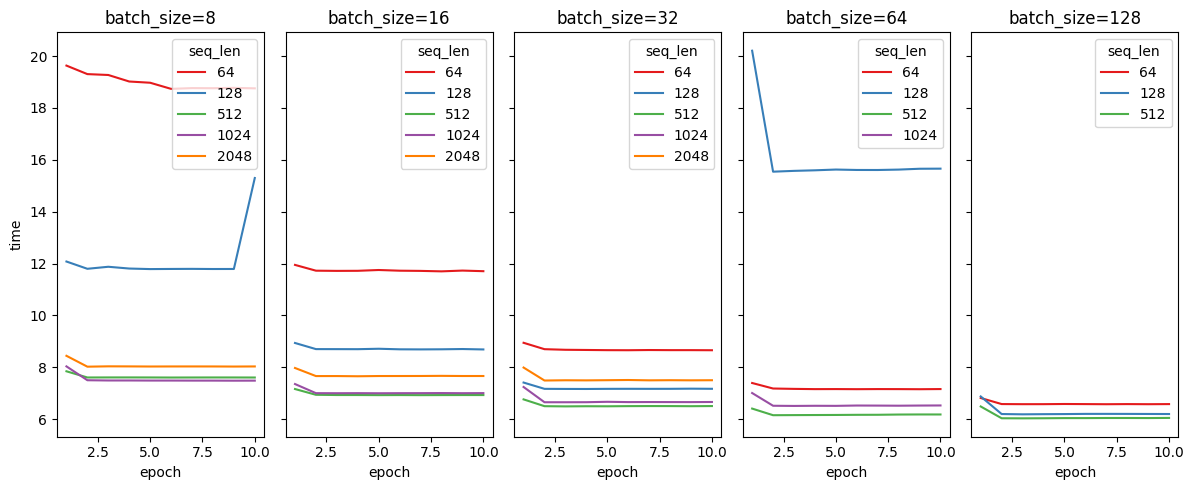

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(12, 5), sharex=True, sharey=True)
ax[0].set_title('batch_size=8')
ax[1].set_title('batch_size=16')
ax[2].set_title('batch_size=32')
ax[3].set_title('batch_size=64')
ax[4].set_title('batch_size=128')


sns.lineplot(data=df_rank0[df_rank0['batch_size']==8], x='epoch', y='time',hue='seq_len', palette='Set1', errorbar=None, ax=ax[0])

sns.lineplot(data=df_rank0[df_rank0['batch_size']==16], x='epoch', y='time',hue='seq_len', palette='Set1', errorbar=None, ax=ax[1])


sns.lineplot(data=df_rank0[df_rank0['batch_size']==32], x='epoch', y='time',hue='seq_len', palette='Set1', errorbar=None, ax=ax[2])
sns.lineplot(data=df_rank0[df_rank0['batch_size']==64], x='epoch', y='time',hue='seq_len', palette='Set1', errorbar=None, ax=ax[3])
sns.lineplot(data=df_rank0[df_rank0['batch_size']==128], x='epoch', y='time',hue='seq_len', palette='Set1', errorbar=None, ax=ax[4])

# remove plot for 1,2
# ax[1, 2].remove()

plt.tight_layout()
plt.savefig('time_batchsize.pdf', dpi=300)